In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp

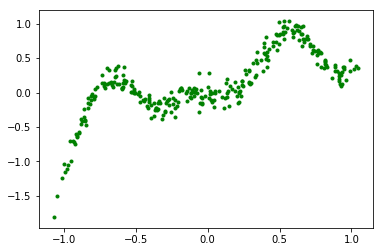

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
x = np.sort(x)

y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise

x = x*2
x = x - x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)

%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.show()

In [3]:
n_hidden = 2
optimizer = tnn.Adam()

net = tnn.AutoForm(new_layers=True)
layer1 = tnn.LinearLayer(1, n_hidden, optimizer=optimizer)
layer2 = tnn.DoubleReluLinearLayer(n_hidden, 1, optimizer=optimizer)
# layer2.weights *= 0

In [4]:
def reposition_break_if_necessary(self:tnn.DoubleReluLinearLayer):
    pass

_______________________
epoch 0
Loss 0.09252171380000071

_______________________
epoch 100
Loss 0.04757701795097443

_______________________
epoch 200
Loss 0.047507406706969325

_______________________
epoch 300
Loss 0.044657018085049786

_______________________
epoch 400
Loss 0.037196189535302175

_______________________
epoch 500
Loss 0.029648429898027344

_______________________
epoch 600
Loss 0.026656724320335636

_______________________
epoch 700
Loss 0.026038847232684206

_______________________
epoch 800
Loss 0.025908382989889154

_______________________
epoch 900
Loss 0.02588363350780445

_______________________
epoch 1000
Loss 0.025878657701051133

_______________________
epoch 1100
Loss 0.025878397958574616

_______________________
epoch 1200
Loss 0.025878385844118633

_______________________
epoch 1300
Loss 0.02587838539577803

_______________________
epoch 1400
Loss 0.025878385383421052

_______________________
epoch 1500
Loss 0.025878385383175866

_______________________


TclError: invalid command name "pyimage14"

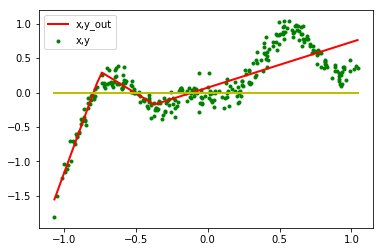

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    
    y_out = net.forward(xx)
    loss = tnn.MseLoss.loss(y_out, yy)
    
    dy = tnn.MseLoss.del_loss(y_out, yy)
    dx = net.backward(dy)
    
    net.update()
    
    if step % 100 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
        plt.plot(x, np.zeros_like(x), c='y', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

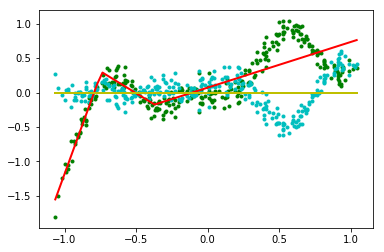

In [6]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
plt.scatter(x, dy, marker='.', color='c', label='x,dy')

plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
plt.plot(x, np.zeros_like(x), c='y', lw=2)

In [7]:
layer1.weights, layer2.weights

(array([[-2.06825042, -1.37283658]]), array([[-2.60549388],
        [-0.24019873],
        [ 0.77696945],
        [-1.65371122]]))

In [8]:
outs = []
for i in range(n_hidden):
    out = layer2.zee[:, i]*layer2.weights[i] + layer2.zee[:, i+n_hidden]*layer2.weights[i+n_hidden]
    outs.append(out)

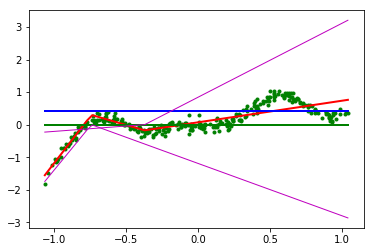

In [9]:
plt.scatter(x, y, marker='.', color='g', label='x,y0')
plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
plt.plot(x, np.zeros_like(x), c='g', lw=2)
plt.plot(x, np.zeros_like(x)+layer2.bias, c='b', lw=2)

for i, out in enumerate(outs):
    plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')

### Adding new neurons at some point with zero output 

In [10]:
from copy import deepcopy

In [24]:
layer1c = deepcopy(layer1)
layer2c = deepcopy(layer2)

In [25]:
w1 = np.hstack([layer1.weights, np.array([[1]])])
w1

array([[-2.06825042, -1.37283658,  1.        ]])

In [26]:
## the boundary of the relu at zero y=wx+b,--> b=-wx
-(-1)*(-0.5)

-0.5

In [27]:
b1 = np.hstack([layer1.bias, np.array([-0.5])])
b1

array([-1.53186041, -0.50831686, -0.5       ])

In [15]:
w2 = np.insert(layer2.weights, [n_hidden, n_hidden*2], np.array([0,0])).reshape(-1,1)
w2

array([[-2.60549388],
       [-0.24019873],
       [ 0.        ],
       [ 0.77696945],
       [-1.65371122],
       [ 0.        ]])

In [32]:
np.split(layer2.weights, 2)

[array([[-2.60549388],
        [-0.24019873]]), array([[ 0.77696945],
        [-1.65371122]])]

In [35]:
idim, odim = layer2.weights.shape

In [37]:
layer2.weights.reshape(2,idim//2,odim)

array([[[-2.60549388],
        [-0.24019873]],

       [[ 0.77696945],
        [-1.65371122]]])

In [40]:
np.array([[0],[0]]).reshape(2,1,1)

array([[[0]],

       [[0]]])

In [44]:
np.concatenate([layer2.weights.reshape(2,idim//2,odim), np.array([[0],[0]]).reshape(2,1,1)], axis=1)

array([[[-2.60549388],
        [-0.24019873],
        [ 0.        ]],

       [[ 0.77696945],
        [-1.65371122],
        [ 0.        ]]])

In [16]:
b2 = deepcopy(layer2.bias)
b2

array([0.42032477])

In [17]:
## creating new network with added neuron
optimizer = tnn.Adam()
n_hidden = 3
net_ = tnn.AutoForm(new_layers=True)
layer1_ = tnn.LinearLayer(1, n_hidden,
                             weights=w1, bias=b1,
                             optimizer=optimizer)
layer2_ = tnn.DoubleReluLinearLayer(n_hidden, 1,
                          weights=w2, bias=b2,
                          optimizer=optimizer)

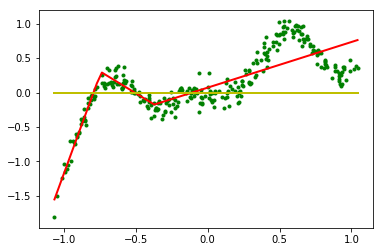

In [18]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
y_out = net_.forward(xx)
plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
plt.plot(x, np.zeros_like(x), c='y', lw=2)

_______________________
epoch 0
Loss 0.02587838538317244

_______________________
epoch 10
Loss 0.024171452266222426

_______________________
epoch 20
Loss 0.022219130653132583

_______________________
epoch 30
Loss 0.020228113965519972

_______________________
epoch 40
Loss 0.018291704748447046

_______________________
epoch 50
Loss 0.016525303406763014

_______________________
epoch 60
Loss 0.014971701718441963

_______________________
epoch 70
Loss 0.013673942529599156

_______________________
epoch 80
Loss 0.01268477122157878

_______________________
epoch 90
Loss 0.011970526169207763

_______________________
epoch 100
Loss 0.011498752872898673

_______________________
epoch 110
Loss 0.011209657624496258

_______________________
epoch 120
Loss 0.011042169523498886

_______________________
epoch 130
Loss 0.010914792392855123

_______________________
epoch 140
Loss 0.01082121889948083

_______________________
epoch 150
Loss 0.01075391023995783

_______________________
epoch 160
Loss 


_______________________
epoch 1360
Loss 0.010689902310612906

_______________________
epoch 1370
Loss 0.010689938254982023

_______________________
epoch 1380
Loss 0.010705057462020506

_______________________
epoch 1390
Loss 0.010733216168890801

_______________________
epoch 1400
Loss 0.010697037829471838

_______________________
epoch 1410
Loss 0.010690724719478377

_______________________
epoch 1420
Loss 0.010691670135326285

_______________________
epoch 1430
Loss 0.01069000273406849

_______________________
epoch 1440
Loss 0.010689967461750396

_______________________
epoch 1450
Loss 0.010689979913317181

_______________________
epoch 1460
Loss 0.010689926198278622

_______________________
epoch 1470
Loss 0.010689906460301067

_______________________
epoch 1480
Loss 0.010689902820874732

_______________________
epoch 1490
Loss 0.010689902309518625

_______________________
epoch 1500
Loss 0.010689902246014248

_______________________
epoch 1510
Loss 0.010689902232268764

________

TclError: invalid command name "pyimage37"

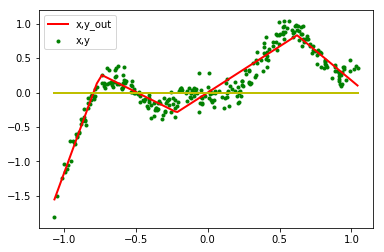

In [19]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):
    
    y_out = net_.forward(xx)
    loss = tnn.MseLoss.loss(y_out, yy)
    
    dy = tnn.MseLoss.del_loss(y_out, yy)
    dx = net_.backward(dy)
    
    net_.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)

        ax.clear()
        plt.scatter(x, y, marker='.', color='g', label='x,y')
        
        plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
        plt.plot(x, np.zeros_like(x), c='y', lw=2)
        plt.legend()
        
        fig.canvas.draw()
        
        plt.pause(0.01)
        print()
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

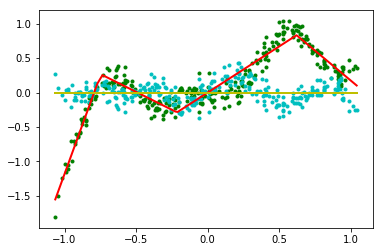

In [20]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g', label='x,y')
plt.scatter(x, dy, marker='.', color='c', label='x,dy')

plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
plt.plot(x, np.zeros_like(x), c='y', lw=2)

In [21]:
outs = []
for i in range(n_hidden):
    out = layer2_.zee[:, i]*layer2_.weights[i] + layer2_.zee[:, i+n_hidden]*layer2_.weights[i+n_hidden]
    outs.append(out)

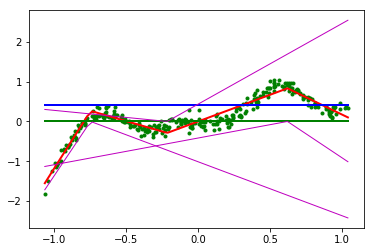

In [23]:
plt.scatter(x, y, marker='.', color='g', label='x,y0')
plt.plot(x, y_out, c='r', lw=2, label='x,y_out')
plt.plot(x, np.zeros_like(x), c='g', lw=2)
plt.plot(x, np.zeros_like(x)+layer2.bias, c='b', lw=2)

for i, out in enumerate(outs):
    plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')